In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Graphics

Before, we go any further with scientific computation, let us insert visualization by means of graphics first. This will make the course content in the following chapter much more accessible, because:

<span style="font-family:Apple Chancery"><font size="4"> - A graph is worth a thousand records (and more) -</font></span>

Graphics provide an easy way to display information extracted from data to the beholder. While graphics are a major tool for reporting purposes, reporting may already mark the endpoint of your journey with the data. Instead of creating graphics only as a final step, they should also be considered at the very beginning of a project: when exploring a dataset for the first time. While creating different plots for a dataset, we will therefor try to explain any oddities we find. 

Python offers several packages, which allow a quick look at your data using basic plot types. The respective functions to build these plots in a basic fashion using the default preferences are highly customizable. 

## Matplotlib

A popular library for graphics in python is [matplotlib](matplotlib). Its functionality is accessed by importing its **API** (commonly under the alias *plt*) ```matplotlib.pyplot as plt```. It works seamlessly with numpy arrays and pandas objects, making it the library of choice here.

In general, when creating a plot, we create a *figure* to which we add *axes* objects. 

```pyplot``` functions then specify which part of the figure is adressed and adds objects to it. Such parts include for example the axes, title or drawing area. In order to customize a plot, you can stack these function calls, since the invoked states will be preserved until the concluding ```plt.show()``` statement creates the graph.

In the following, we will look at basic examples of different plots and learn the more specific syntax on the fly. For an overview of plots and how to create them, look at [this gallery of plots](https://matplotlib.org/stable/gallery/index.html) from matplotlib.


We will use some modified credit card data from [this kaggle page](https://www.kaggle.com/sakshigoyal7/credit-card-customers).

In [2]:
df = pd.read_csv("../data/bank_churners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,0.000


In order to create a meaningful plot, the type must be chosen depending on the type of the variables which are usually either categorical or numerical. The latter may be further categorized into integers and floats while integers often indicate an ordinal scale and floating point numbers typically point to real values which are on a metric scale (sometimes metric scaled variables are also provided as integers).

### Categories 

Such variables are usually (but not necessarily) of type string. After identifying a variable to be categorical, one must decide whether it is of ordinal - the levels can be ranked - or nominal scale - they cannot be ranked. Examples from our dataset are *Income_Category* for ordinal and *Martial_Status* for nominal scale. 

For categorical variables, bar charts and histograms are maybe the first plot type you should consider. The difference however, is only the order and vizualisation: ordinal data uses histograms, which appear column to column in a defined order, nominal data uses barcharts with spacing between the columns and no specific order. To build the standard plots, we need not do more than call the ```hist()``` or ```bar``` function with the respective data.

#### Bar Charts

We need to provide the categories and the height of the variable. With the ```.unique()``` method, we get all levels present in the variable, with `.calue_counts()` we get the number of occurrences.

<BarContainer object of 4 artists>

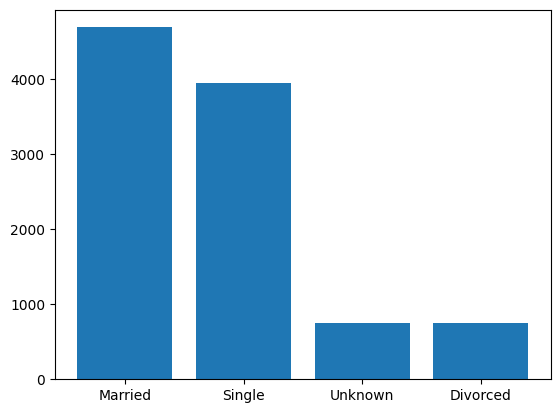

In [3]:
plt.bar(df.Marital_Status.unique(), df.Marital_Status.value_counts())  #create object

:::{admonition} Warning
Jupyter Notebook will automatically display graphics from a matplotlib object. Using the statement above would not create a plot elsewhere, as this only creates an object for plotting. 

Use the ```plt.show()``` statement!
:::

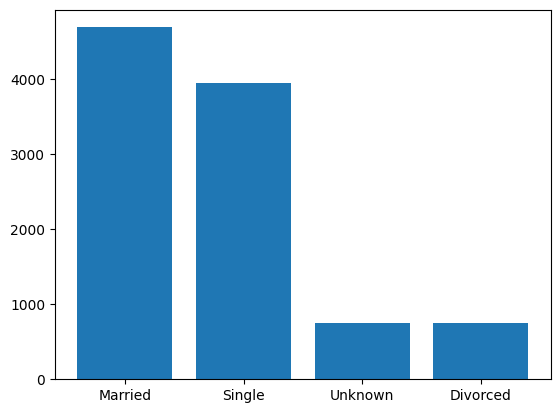

In [4]:
plt.bar(df.Marital_Status.unique(), df.Marital_Status.value_counts())
plt.show()    # show image

#### Histograms

Histograms are used, when the distribution of a numerical variable should be displayed

The default number of bins in matplotlib is 10 with equal spacing. For a more detailed look or further processing, we can use the `hist()` function to get the number of samples in each bin, the borders of the bins and the patches, i.e.the displayed parts of the histogram.

Let's change the number of bins to 5 and view these unpacked parts. (Note that jupyter will print the plot any way)

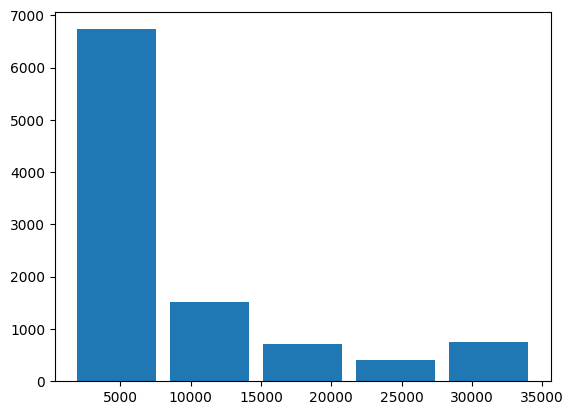

samples in bin: [6735. 1520.  706.  413.  753.] 
bin borders: [ 1438.3   8053.84 14669.38 21284.92 27900.46 34516.  ]
patches: Rectangle(xy=(1934.47, 0), width=5623.21, height=6735, angle=0) Rectangle(xy=(8550.01, 0), width=5623.21, height=1520, angle=0)


In [5]:
n, bins, patches = plt.hist(df.Credit_Limit, bins=5, rwidth=.85)
plt.show()
print('samples in bin:', n, '\nbin borders:', bins)
print('patches:', patches[0], patches[1])

We see that the ticks are not automatically matching the bars. To solve this, we can use the bin borders, ```bins``` from above, to set the ticks and labels on the x axis.

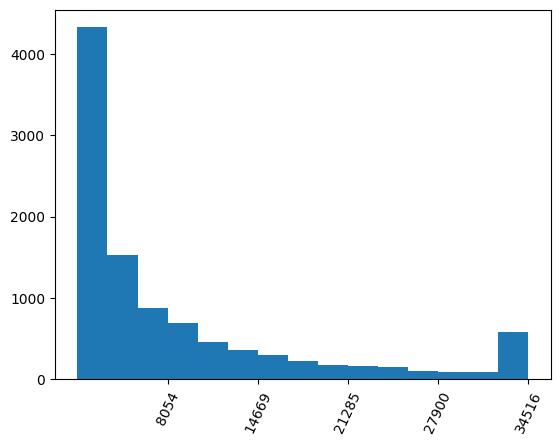

In [6]:
plt.hist(df.Credit_Limit, bins=15)
plt.xticks(ticks=bins[1:], rotation=65)    # set xticks at bin border
plt.show()

### Subplots

We can compare two results side by side, using the ```subplot(nrow, ncol, index)``` function.
We specify how many plots to show by the number of rows and columns in the parentheses. To make one cell of the figure the current subplot, call the subplot function before.

- At first, we specify a larger figure size. 
- We choose 15 bins
- For colours, *matplotlib* automatically recognizes RGB and RGBA when a 3- or 4-tuple is provided to `color`
- We also add titles and change the colours to better differentiate between the plot from above and the modified one. Nore the state based approach of calling these functions subsequently
- Since the tick labels in the right plot are too long and would overlap, we rotate them

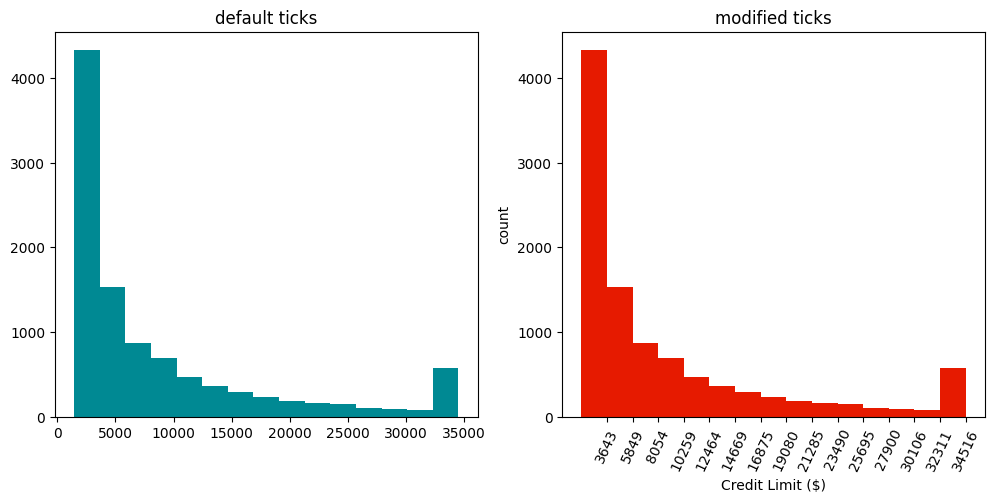

In [7]:
plt.figure(figsize=(12,5))    # this will stretch/compress the plots to fit the figsize

plt.subplot(1,2,1)    # first subplot of two in one row
plt.hist(df.Credit_Limit, bins=15, color=(0,137/255,147/255))
plt.title('default ticks')    # add title

plt.subplot(1,2,2)    # second subplot
n, bins,_ = plt.hist(df.Credit_Limit, bins=15, color=(.9,.1,0,1))
plt.title('modified ticks')

plt.ylabel('count')
plt.xlabel('Credit Limit ($)')
plt.xticks(ticks=bins[1:], rotation=65)    # set xticks at bin border

plt.show()   # only after all subplots have been defined

The rightmost bar strikes the eye as it interrupts the decreasing trend seen towards higher values. If we check for the occurence of the maximum value by `Python len(df[df.Credit_Limit == max(df.Credit_Limit)])`, we find it occurs 508 times. This is in indication, that the dataset has been clipped. Meaning that values higher or lower than some critical values are overwritten by these values. 

See this numpy example with the ```clip()``` function:

In [8]:
print(np.clip([-1,2,3,4,11,100], 3, 4))    # the list values are clipped to 3 and 4, respectively

[3 3 3 4 4 4]


A more special case arises for the variable **Income_Category** which is already binned to categories but can be ranked. We would want to order the bars accordingly.

While the default ```plt.bar()``` would only make a random order of the categories, we can specify this order by providing the tick positions and labels. Another way to do this is by mapping the values to integers, according to their rank. Either way, some work by hand is required to reorder the bars.

We will define a dictionary containing k-v pairs for mapping and then use pandas' ```map()``` function (You will learn about pandas in the next chapters).

In [9]:
(df.Income_Category.unique())    # get unique values to biuld dict in next step

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [10]:
map_income = {'Unknown': 0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
print(pd.concat( [df.Income_Category[:3], df.Income_Category[:3].map(map_income)], axis=1))

   Income_Category  Income_Category
0      $60K - $80K                3
1   Less than $40K                1
2     $80K - $120K                4


We will use a different syntax for creating subplots this time, using the ```subplots()``` function (plural!). It unpacks into a *figure* and an *axes* object. (We could use this syntax for just one plot, too.) Since we want to display 3 subplots, we unpack the axes objects into a tuple of length 3. We call these objects ```ax1```, ```ax2``` and ```ax3```. The respective plot method will then be called on these objects. The commands for ticks etc. change from the case before.

Note that for the second plot, we could have used a list in the desired order. The dict, i.e. the values of the dict, are only used for the histogram.

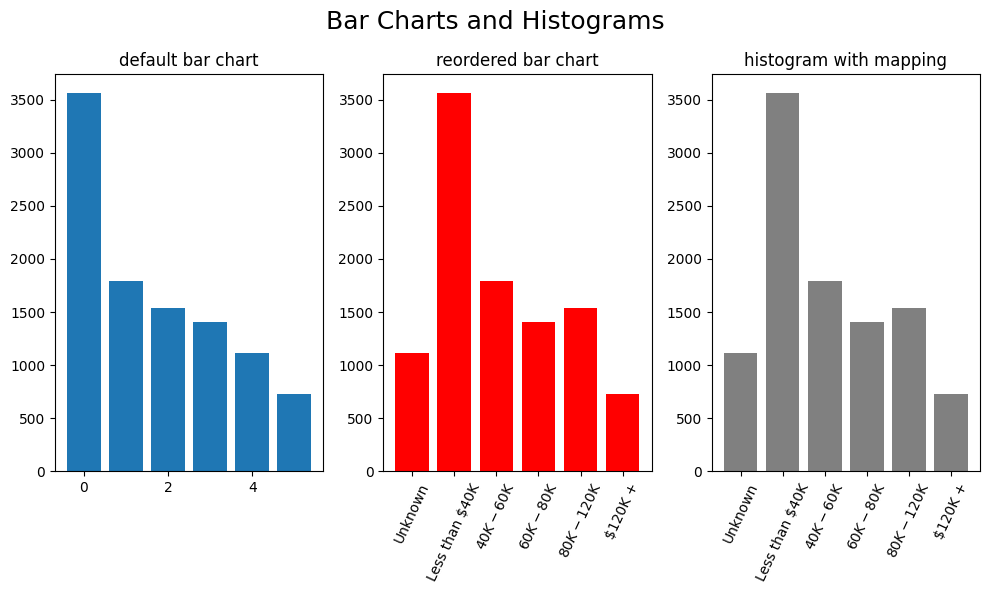

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,6))     # unpacking into figure and 3 axes objects

fig.suptitle('Bar Charts and Histograms', fontsize=18)

ax1.bar(range(len(df.Income_Category.unique())), height=df.Income_Category.value_counts())
ax1.title.set_text('default bar chart')

ax2.bar([k for k,v in map_income.items()], color='red', 
        height=[df.Income_Category.value_counts()[k]
                for k,v in map_income.items()],)    # unpack keys as labels, note that a list would suffice here
ax2.title.set_text('reordered bar chart') 
ax2.set_xticks(range(6))    # warning if not specified before the labels
ax2.set_xticklabels([k for k,v in map_income.items()], rotation=65)

n, bins, _ = ax3.hist(df.Income_Category.map(map_income), bins=6, rwidth=.8, color='grey')
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
ax3.set_xticks(bins[:-1]+bin_width)  
ax3.set_xticklabels([k for k,v in map_income.items()], rotation=65) # unpack keys as labels
ax3.title.set_text('histogram with mapping')

plt.tight_layout()    # rearrange subplots for a better look
plt.show()

We can see that we basically built the same plot (middle and right) by using a bar plot and a histogram. Now, there are many more options on how to build histograms. One last example is to display two variables in the same plot: a grouped and stacked histogram

It should be noted, that the values should lie in the same range approximately. For the first plot, we provide the variables as a list to the ```hist()``` function. For the second plot, we use the state based approach and create two plots which we display in the same graphic.

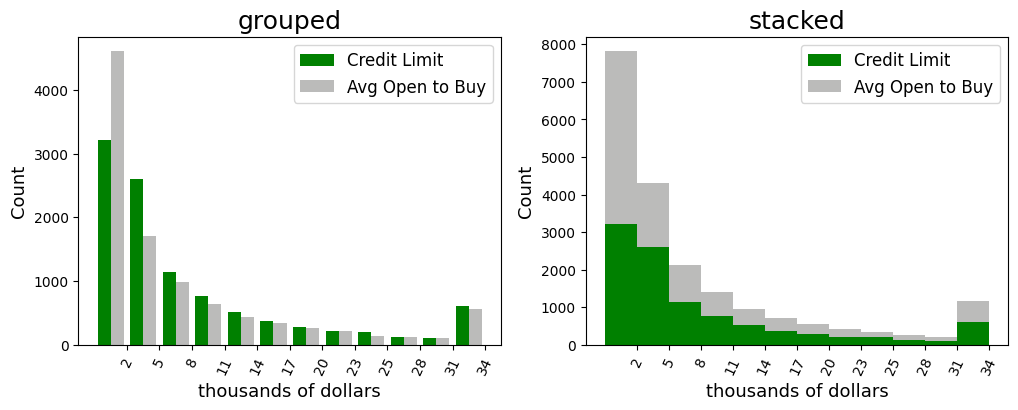

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))     # unpacking into figure and 2 axes objects

n, bins, _ = ax1.hist([df.Credit_Limit, df.Avg_Open_To_Buy], bins=12, 
                     color=['green', (142/255,142/255, 141/255, .6)])
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
ax1.set_xticks(bins[1:])  
ax1.set_xticklabels([int(b/1000) for b in bins[1:]], rotation=65) 
ax1.title.set_text('grouped')
ax1.title.set_fontsize(18)
ax1.legend(['Credit Limit', 'Avg Open to Buy'], fontsize='large')
ax1.set_xlabel('thousands of dollars', fontsize = 13)
ax1.set_ylabel('Count', fontsize = 13)

n, bins, _ = ax2.hist([df.Credit_Limit, df.Avg_Open_To_Buy], bins=12,
                     color=['green', (142/255,142/255, 141/255, .6)], stacked=True)
ax2.set_xticks(bins[1:])  
ax2.set_xticklabels([int(b/1000) for b in bins[1:]], rotation=65) 
ax2.title.set_text('stacked')
ax2.title.set_fontsize(18)
ax2.legend(['Credit Limit', 'Avg Open to Buy'], fontsize='large')
ax2.set_xlabel('thousands of dollars', fontsize = 13)
ax2.set_ylabel('Count', fontsize = 13)


plt.show()

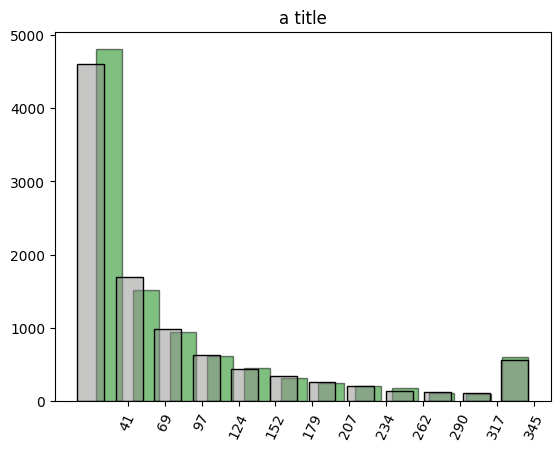

In [13]:
n, bins, _ = plt.hist([df.Credit_Limit], bins=12, rwidth=.7, color=['green'], alpha=.5, edgecolor='black')
bin_width = (bins[1] - bins[0])/2    # calculate half bin width for centered tickmarks
plt.xticks(bins[1:], [int(b/100) for b in bins[1:]], rotation=65) 

n, bins1, _ = plt.hist([df.Avg_Open_To_Buy], bins=12, rwidth=.7, 
                     color=[(142/255,142/255, 141/255, .5)], edgecolor='black')

plt.title('a title')
plt.show()

The basic framework stays the same for all other plots that can be created using matplotlib. We will have a look at two more examples before switching to a different library more specific for statistical plots.

### Numerical Data

Beside categorical data, we often deal with numerical data. We have already used **Credit_Limit** for a histogram so far. 

#### Scatter Plots

This kind of plot uses uses variables from the dataset on both axes, unlike before where we saw the count on the y-axis. Scatter plots are particularly useful for checking relationships between two variables. To create a scatterplot, use ```plt.scatter()```.

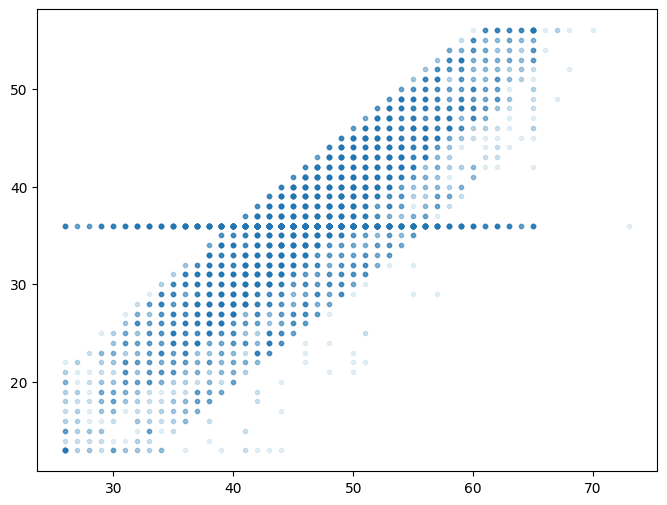

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df.Customer_Age, df.Months_on_book, marker='.', alpha=.1)
plt.show()

We clearly see a positive linear correlation between the two variables. We also see, that one value of Months_on_Book appears throughout all ages. This is likely from imputing missing values, i.e. if this information is not available, the system instantly or some data engineer later set the value to the mean or some other statistical indicator.

Let's quantify the high correlation between the variables and then see if we can find out more about the value appearing almost as horizontal line.

In [15]:
print(np.round(np.corrcoef(df.Customer_Age, df.Months_on_book)[0][1], 2))

0.79


In [16]:
print(df.Months_on_book.value_counts().iloc[:3])    # no surprise, it is the most frequent number for this variable

Months_on_book
36    2463
37     358
34     353
Name: count, dtype: int64


In [17]:
print(f'mean of whole dataset: {df.Months_on_book.mean():.2f}')
print(f'mean without 36 months at all: {df[df.Months_on_book!=36].Months_on_book.mean():.2f}')

mean of whole dataset: 35.93
mean without 36 months at all: 35.91


Another way to make your scatterplots more fancy and more informative, is through grouping by some third variable and display these groups using different colours. This is particularly interesting for categorical variables, where the markers are coloured according to the single levels.

Note the dictionary containing the colour codes for the categories and the ```for``` loop used to create axes objects. We could have used the `c=df.Card_Categories.map(card_col)`, but then we would not get a legend.

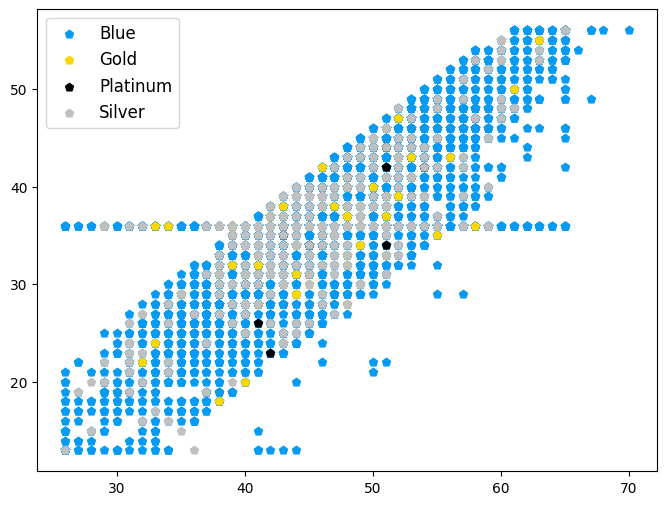

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

# use only rows in upper half of total revolving balance for less data points
groups = df[df.Total_Revolving_Bal > df.Total_Revolving_Bal.mean()].groupby(df.Card_Category)

# dictionary with 
card_col = {'Blue': '#069AF3', 'Gold': 'gold', 'Platinum': 'black', 'Silver': 'silver'}

# loop over the groups to create axes objects
for name, group in groups:
    ax.scatter(group.Customer_Age, group.Months_on_book, marker='p', alpha=1, label=name, color=card_col[name])
ax.legend(prop={'size': 12})

#show in same plot
plt.show()

Beside the colour, the **marker size** can also be customized to display a relative difference between third variables of the observations. 

Note that the size parameter ```s``` needs an numerical input, which could refer to categories, e.g. through mapping.

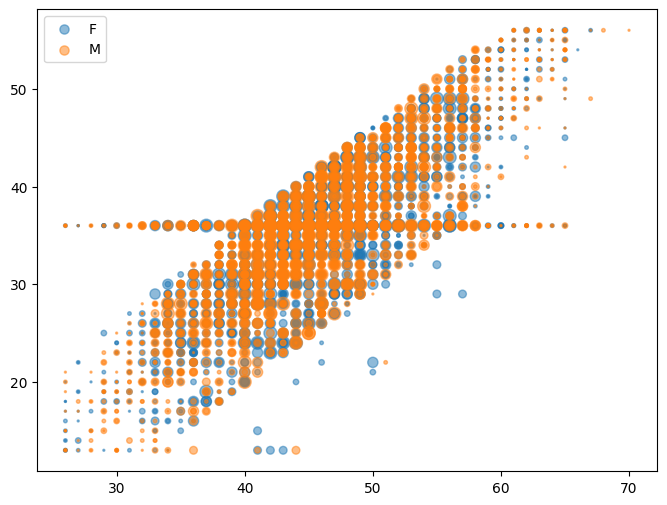

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

# use only rows in upper half of total revolving balance for less data points
groups = df[df.Total_Revolving_Bal > df.Total_Revolving_Bal.mean()].groupby(df.Gender)

# loop over the (two) groups to create axes objects
# make marker size according to fourth variable
for name, group in groups:
    ax.scatter(group.Customer_Age, group.Months_on_book, marker='.', alpha=.5, label=name,
               s=(group.Dependent_count+2)**3)   # resizing might be necessary
ax.legend()

plt.show()

#### Line plots

The 'most standard' type of plot may be the **line plot**. It is used for example to display the evolution of a variable over time like in stock charts. Another example would be the visualisation of a fit curve or some distribution in a histogram.

To create a lineplot, use the ```plot()``` function. We will at first look at how to plot a normal distribution and then simulate random variables accordingly to compare them in a histogram.

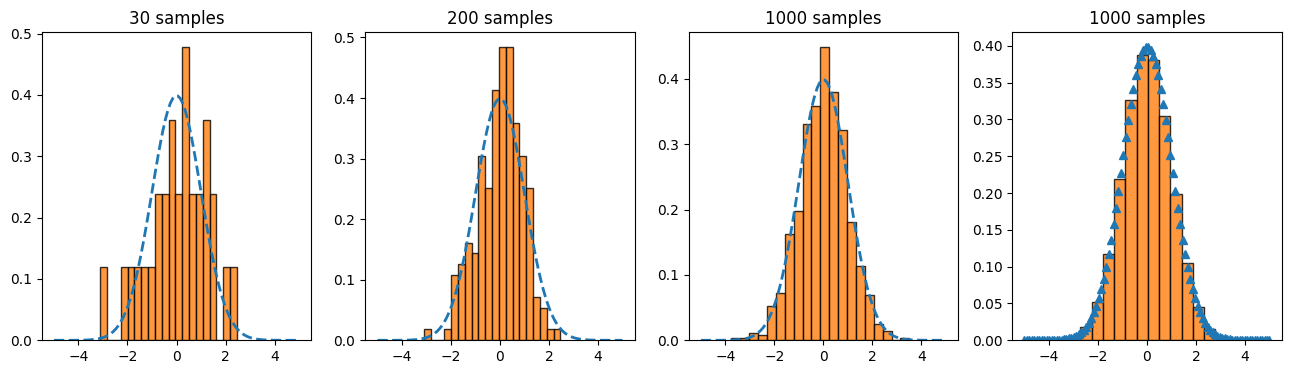

In [20]:
# define function for plotting
def my_gauss(x, mu, sig):
    return (1/(sig * np.sqrt(2* np.pi))) * np.exp(-.5 * ((x-mu)/sig)**2)
    
# define x values
x = np.linspace(-5,5, 100)

# y values
y = my_gauss(x, 0 ,1)

# draw random numbers from standard normal
my_rands = np.random.normal(0,1,100000)
 
samples= [30, 200, 1000]

plt.figure(figsize=(16,4))

for i,s in enumerate(samples):
    plt.subplot(1,4,i+1)
    plt.plot(x,y, linestyle='--', lw=2)
    plt.hist(my_rands[:s], bottom=0, bins=20, density=True, alpha=.8, edgecolor='black')
    plt.title(f'{s} samples')
    
plt.subplot(1,4,4)
plt.plot(x,y, marker='^', ls='')
plt.hist(my_rands, bottom=0, bins=20, density=True, alpha=.8, edgecolor='black')
plt.title(f'{s} samples')
plt.show()

Matplotlib includes many useful shortcuts in customizing the graphics: colors (simply 'blue' instead of an rgb code), the markers (e.g. '^' for triangles) and the linestyle ('--' for a dashed line). They can be found in the documentation of the respective function. In general, it is always useful to check the documentation when creating a graph that should be beyond the standard, because of the mutltitude of built-in keywords. 

While Matplotlib offers the possibility to create and customize plots almost at will, it sometimes does not quite have the right plot readily availabe. For statistical plots and graphics, another library includes more predefinded functions for a wide variety of plot types.  

## Seaborn

[Seaborn](https://seaborn.pydata.org) is a library for statistical plots and graphs. It is based on matplotlib and thus works neatly with pandas and numpy as well. The advantage is the many plot types which are available which may be tiresome to build ourselves using matplotlib. Beside more available default plot types than in matplotlib, seaborn includes composite graphics, where one command automatically renders a set of graphics. This makes exploring of a dataset even quicker. In the following, we will show some of the above plots and new kinds of standard statistical plots in seaborn. 

The syntax is slightly different to matplotlib: The ```data``` argument specifies the dataframe/array and the variables are selected as strings. Note however, that since seaborn is built upon the matplotlib framework, we can still use the syntax used above. Furthermore, we can utilise some functions we have learned before. We would then just need to import matplotlib as well.

At first we will again look at bar plots. To create the same plot as in the beginning of this chapter in seaborn, we use the ```countplot()``` function. To rotate the ticks, we can use different approaches. Another difference to the examples with pyplot is the ```order``` keyword.

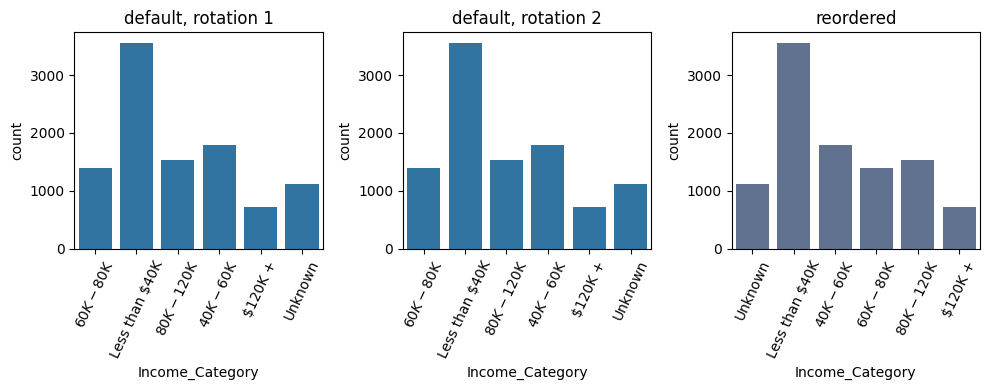

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.countplot(x = 'Income_Category', data = df)
plt.xticks(rotation=65)
plt.title('default, rotation 1')

plt.subplot(1,3,2)
ctplot = sns.countplot(x = 'Income_Category', data = df)
for item in ctplot.get_xticklabels():
    item.set_rotation(65)
ctplot.set_xticklabels
plt.title('default, rotation 2')
    
plt.subplot(1,3,3)
order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
color = (.35, .44 , .6)
new = sns.countplot(x = 'Income_Category', data = df, order=order, color=color)
plt.xticks(rotation=65)
plt.title('reordered')

plt.tight_layout()

For histograms additional functionality is readily available. The ```displot()``` function builds the basic histogram. In seaborn, we only need single keywords to build more advanced plots:

- ```kind``` defines the kind of plot
- ```col```/```row``` creates subplots for the levels of the respective variable
- ```hue``` creates one plot with all categories separately coloured
- ```rug```, if True, creates marignal ticks for every observation
- ```kde``` uses a dernel density estimation, i.e. it displays histogram and estimated density

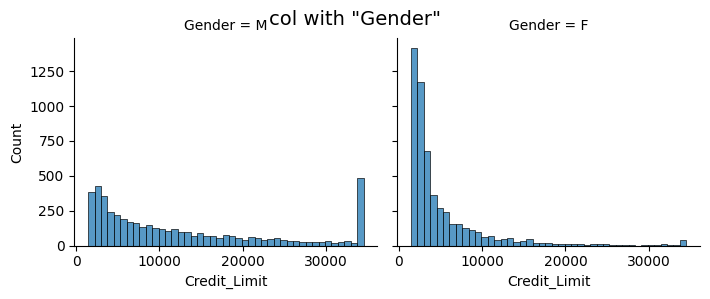

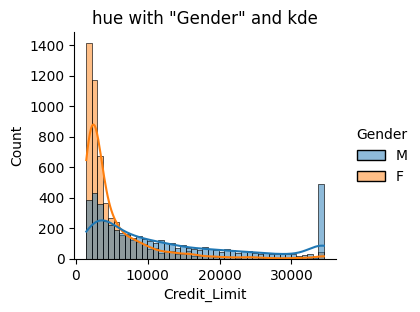

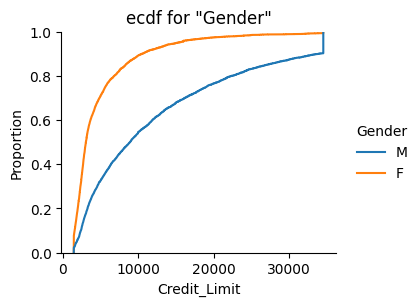

In [22]:
sns.displot(data=df, x="Credit_Limit", col="Gender", kind='hist', height=3, aspect=1.2)
plt.suptitle('col with "Gender"', fontsize=14)    # use suptitle, as subplots are automatically created

sns.displot(data=df, x="Credit_Limit", hue="Gender", kde=True, height=3, aspect=1.2)
plt.title('hue with "Gender" and kde')

sns.displot(data=df, x="Credit_Limit", hue="Gender", kind='ecdf', height=3, aspect=1.2)
plt.title('ecdf for "Gender"')
plt.show()

At this point, we will no longer repeat the plot types we have seen in the previous chapter. However, you are advised to check how to create them using seaborn and learn about the additional possibilities.

We will now look at some other plots which come with seaborn by default and may not be built so quickly using pyplot. A more complete set of available plot types can be found [here](https://seaborn.pydata.org/examples/index.html)

### Heatmaps

This is a special kind of plot, that is often used to visualize correlation matrices. It shows variables (or categories) on the axes and rectangles in the plot which are usually coloured with respect to some value. 

For a correlation matrix, we first have to calculate it using numpy. The resulting matrix can then be passed to seaborn. 

To compute the correlation, we need to either omit the categorical variables or use one-hot encoding. For this example, we will only look at numerical variables and use the usual Pearson correlation.

In [23]:
corr_df = df.select_dtypes('int64').drop('CLIENTNUM', axis=1)   # select only numerical variables
                                                                 # exclude system variable
corr_mat = corr_df.corr()    # create correlation matrix
corr_mat    # not using the print statement makes it more pretty thanks to jupyter

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.014780
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,-0.002688
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.008623
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,0.013726
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.042210
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,-0.053913
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,1.000000


We now only have to call seaborn's ```heatmap()``` function: 

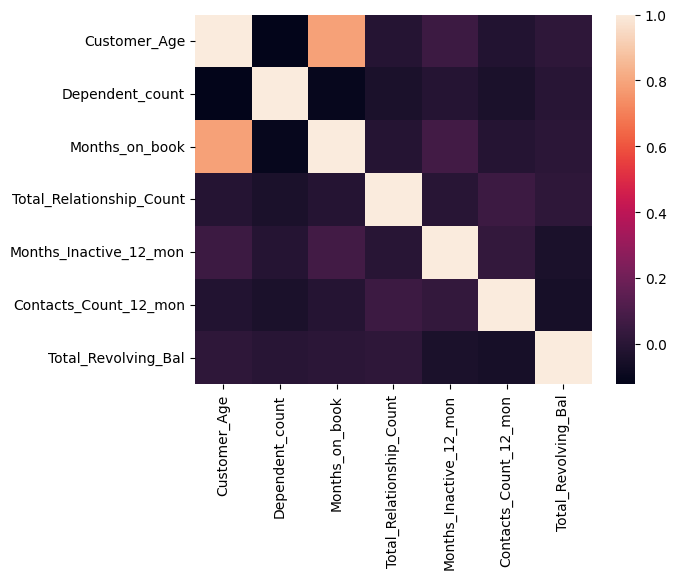

In [24]:
sns.heatmap(corr_mat)
plt.show()

The high correlation between 'Months_on_Book' and 'Customer_Age' we found earlier can now clearly be seen by the light field corresponding to a high correlation. We could further mask the upper half, since the matrix is symmetric and all information is included in one half. We will also add the rounded value of the correlation coefficient. At last, we use a custom colour map to try and get a better contrast for the lower values.

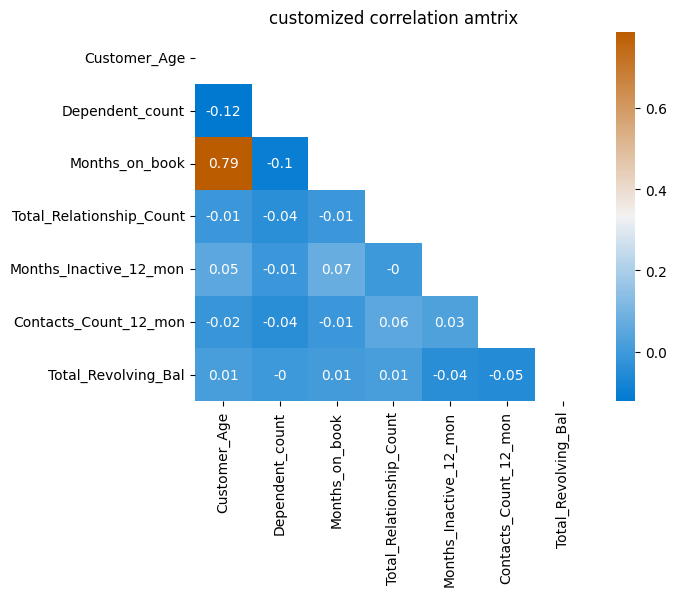

In [25]:
# create mask
mask = np.triu(np.ones_like(corr_mat))

# create custom colour bar
cmap = sns.diverging_palette(250, 390, l=50, s=100, as_cmap=True)

sns.heatmap(corr_mat, annot= np.round(corr_mat,2), mask=mask, cmap=cmap)
plt.title('customized correlation amtrix')
plt.show()

### Boxplot

Boxplots are used to depict several descriptive statistics of a numerical variable at once. The usually contain the following elements:

- a box, stretching from the first to the third quartile
- a line in the box, indicating the median value
- two whiskers, one pointing upwards and the other downwards

The whiskers may represent different quantities, like a specific quantile or even the maximum and minimum value. By default, the whisker length is definded by the inter-quartile range:
$a \cdot Q_{0.75} - Q_{0.25}$

The respective keyword for the factor $a$ is ```whis```, accepting a float.
In this configuration, outliers, i.e. data points above or beyond the respective quantiles, are shown as single dots. 

The whiskers are only drawn to the maximum/minimum value in each direction, meaning that one whisker could be shorter than the other or be omitted completely, if no data points fall in this interval.

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4s/pvpdg_853pxbc7m5x3m5x88w0000gn/T/ipykernel_96555/3329670499.py:9: SyntaxWarning: invalid escape sequence '\c'
  plt.text(x_val,np.quantile(df.Credit_Limit,.75)+1.5*iqr,'$Q_{75}+1.5 \cdot IQR$', fontsize=14)


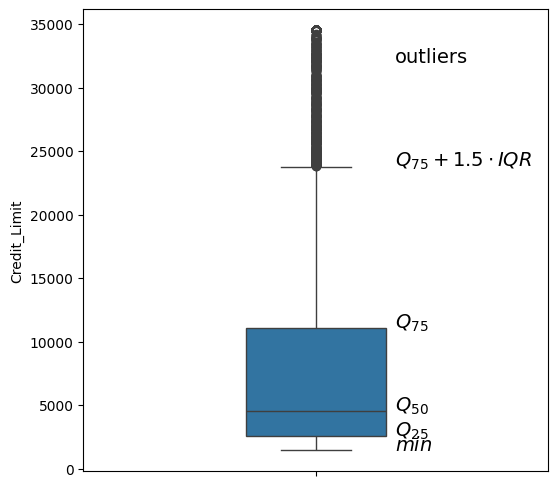

In [26]:
plt.figure(figsize=(6,6))
x_val = .17
sns.boxplot(y=df.Credit_Limit, whis=1.5, width=.3)
plt.text(x_val,32e3,'outliers', fontsize=14)
# interquartile range
iqr = np.quantile(df.Credit_Limit, .75) - np.quantile(df.Credit_Limit, 0.25)

# upper whisker -> max value inside (Q_75 + 1.5 IQR)
plt.text(x_val,np.quantile(df.Credit_Limit,.75)+1.5*iqr,'$Q_{75}+1.5 \cdot IQR$', fontsize=14)

# Quartile
plt.text(x_val,np.quantile(df.Credit_Limit, .75),'$Q_{75}$', fontsize=14)
plt.text(x_val,np.median(df.Credit_Limit),'$Q_{50}$', fontsize=14)
plt.text(x_val,np.quantile(df.Credit_Limit, .25),'$Q_{25}$', fontsize=14)

# lower whisker -> min value inside (Q_25 - 1.5 IQR)
plt.text(x_val,max(np.quantile(df.Credit_Limit,.25)-1.5*iqr, min(df.Credit_Limit)),'$min$', fontsize=14)
plt.show()

### Violin Plot

A plot showing similar information (and is maybe more aesthetic) is the violin plot. It includes a kernel density estimation which is shown on both sides of the middle axis. This adds visual information beyond the quartiles and outliers, by displaying the distribution of values.

Specifying ```inner="quartile"``` introduces respective lines for the 1st, 2nd and 3rd quartile.

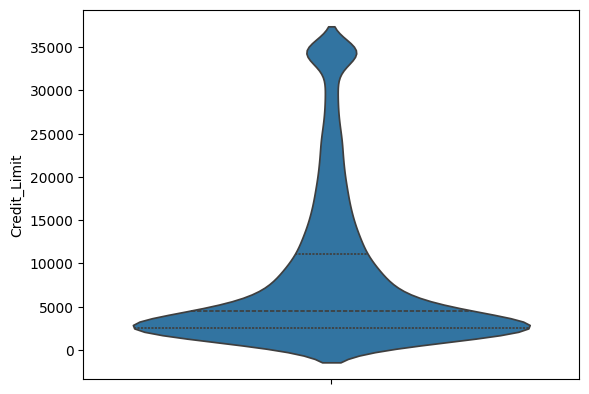

In [27]:
sns.violinplot(data=df.Credit_Limit, inner="quartile")
plt.show()

We can display the distribution of one variable with respect to the (customized order) levels of a second variable. Furthermore, we can also use a 'hue' for a third variable. For dichotomous variables, setting ```split=True``` makes use of both sides of a violinplot, instead of creating sets of two violinplots.  

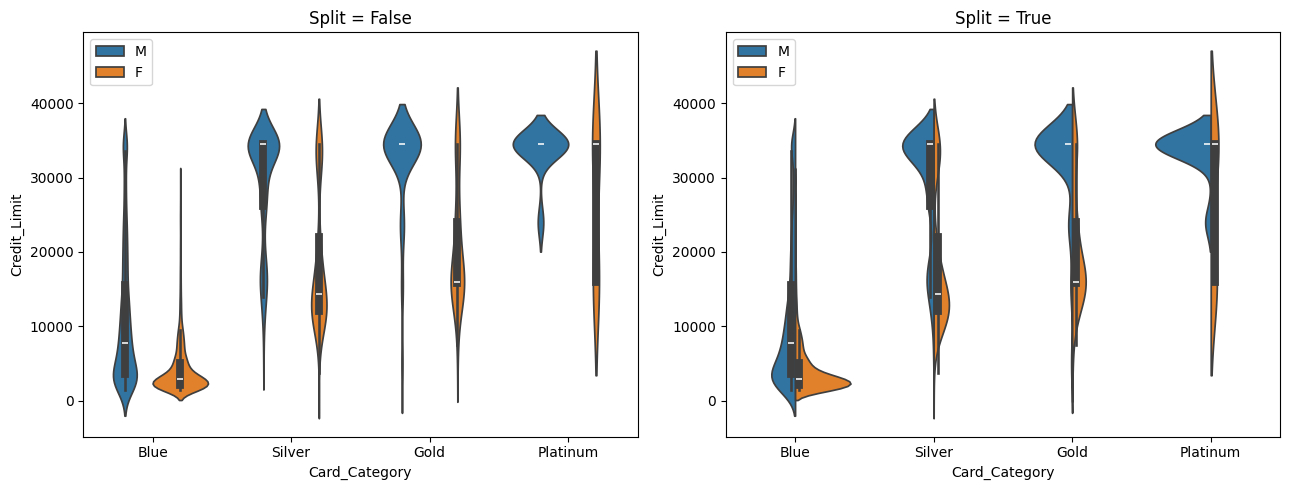

In [28]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.violinplot(data=df, y='Credit_Limit', x='Card_Category', hue = 'Gender', split = False,
               order=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend(loc=2)
plt.title('Split = False')
plt.subplot(1,2,2)
sns.violinplot(data=df, y='Credit_Limit', x='Card_Category', hue = 'Gender', split = True,
               order=['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend(loc=2)
plt.title('Split = True')

plt.tight_layout()

plt.show()

## Plotly

Add later ...